In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<ipython-input-39-2791097da61b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
<ipython-input-39-2791097da61b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
<ipython-input-39-2791097da61b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')
<ipython-input-39-2791097da61b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

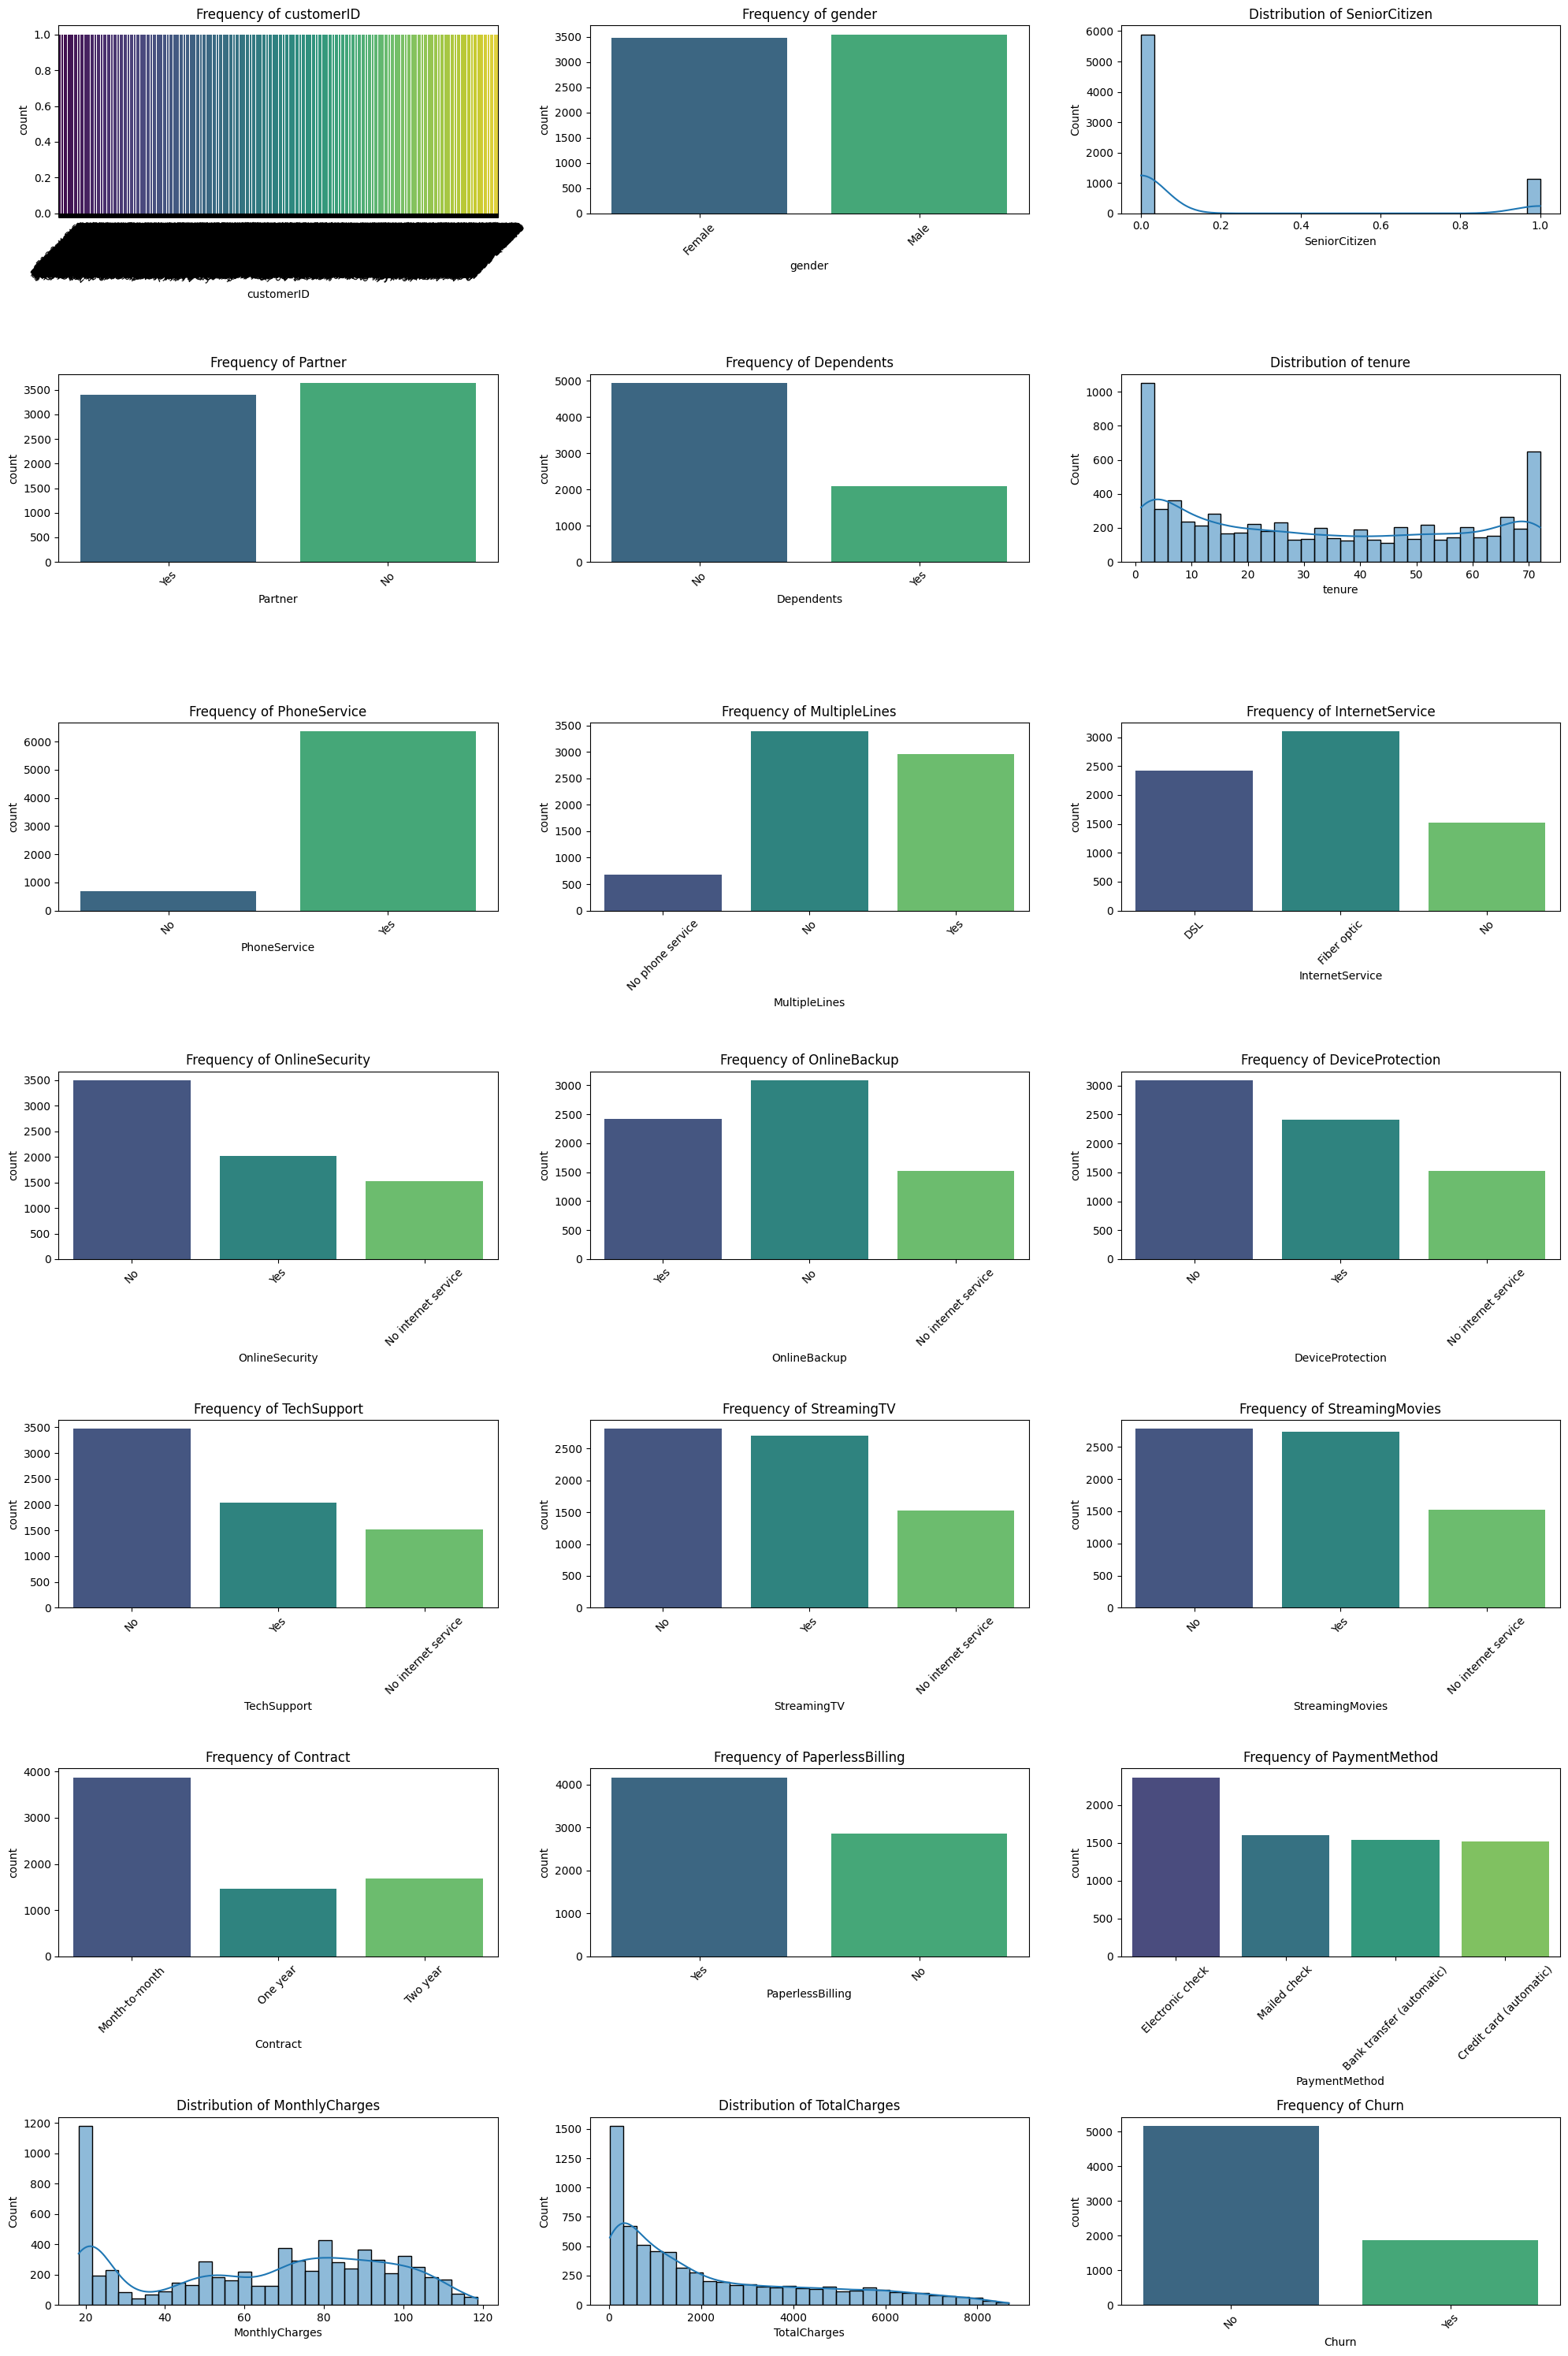

In [39]:
# Set up the figure and axes
plt.figure(figsize=(20, 30))

# Loop through all columns and plot histograms
for i, column in enumerate(df.columns, 1):
    plt.subplot(7, 3, i)  # Adjust the grid size based on the number of columns
    if df[column].dtype in ['int64', 'float64']:  # Numerical variables
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
    else:  # Categorical variables
        sns.countplot(data=df, x=column, palette='viridis')
        plt.title(f'Frequency of {column}')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

plt.show()

In [40]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows after encoding
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [41]:
# Split the dataset into features (X) and target (y)
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.48      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110

[[1384  165]
 [ 289  272]]


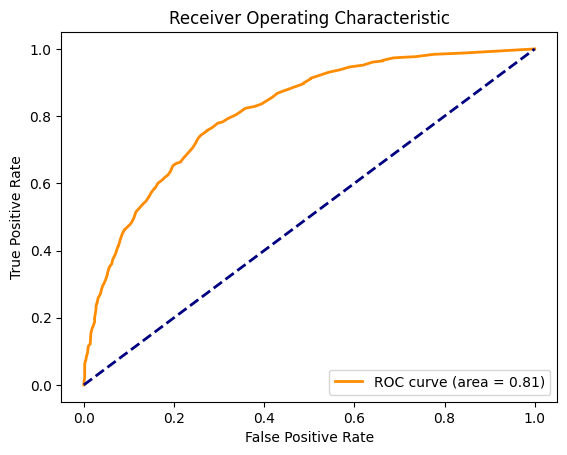

In [42]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ROC Curve and AUC
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
# Based on the Elbow Method and Silhouette Score, choose the optimal number of clusters
optimal_k = 2  # Example value, choose based on the plots

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows with cluster labels
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,1
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,1
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,1


In [43]:
# Define segmentation rules
def categorize_customer(row, star_threshold, vulnerable_threshold, free_rider_threshold):
    # High-value, loyal, and low churn risk
    if row['TotalCharges'] > df['TotalCharges'].quantile(star_threshold) and row['MonthlyCharges'] > df['MonthlyCharges'].quantile(star_threshold) and row['tenure'] > df['tenure'].quantile(star_threshold) and row['Churn'] == 0:
        return 'Stars'
    # Moderate value but high churn risk
    elif row['TotalCharges'] > df['TotalCharges'].quantile(vulnerable_threshold) and row['MonthlyCharges'] > df['MonthlyCharges'].quantile(vulnerable_threshold) and row['Churn'] == 1:
        return 'Vulnerable'
    # Low value but low churn risk
    elif row['TotalCharges'] < df['TotalCharges'].quantile(free_rider_threshold) and row['MonthlyCharges'] < df['MonthlyCharges'].quantile(free_rider_threshold) and row['Churn'] == 0:
        return 'Free Riders'
    # Low value and high churn risk
    else:
        return 'Lost Causes'

# Initial thresholds
star_threshold = 0.7
vulnerable_threshold = 0.3
free_rider_threshold = 0.3

# Apply the categorization function to each row
df['CustomerSegment'] = df.apply(categorize_customer, args=(star_threshold, vulnerable_threshold, free_rider_threshold), axis=1)

# Adjust the quantile thresholds to achieve a more even distribution
while True:
    counts = df['CustomerSegment'].value_counts()
    if (counts.get('Stars', 0) / len(df) > 0.2 and
        counts.get('Vulnerable', 0) / len(df) > 0.2 and
        counts.get('Free Riders', 0) / len(df) > 0.2 and
        counts.get('Lost Causes', 0) / len(df) > 0.2):
        break
    else:
        # Adjust thresholds (example logic, you might need to fine-tune this)
        if counts.get('Stars', 0) / len(df) < 0.2:
            star_threshold -= 0.05  # Decrease threshold for 'Stars'
        if counts.get('Vulnerable', 0) / len(df) < 0.2:
            vulnerable_threshold -= 0.05  # Decrease threshold for 'Vulnerable'
        if counts.get('Free Riders', 0) / len(df) < 0.2:
            free_rider_threshold += 0.05  # Increase threshold for 'Free Riders'

        # Reapply categorization with adjusted thresholds
        df['CustomerSegment'] = df.apply(categorize_customer, args=(star_threshold, vulnerable_threshold, free_rider_threshold), axis=1)

# Save the updated dataframe to a new CSV file
df.to_csv('Telco-Customer-Churn-Segmented.csv', index=False)

# Display the distribution of segments
print(df['CustomerSegment'].value_counts())

# Display the first few rows with the new column
print(df[['customerID', 'TotalCharges', 'MonthlyCharges', 'tenure', 'Churn', 'CustomerSegment']].head())

CustomerSegment
Lost Causes    2496
Free Riders    1643
Vulnerable     1477
Stars          1416
Name: count, dtype: int64
   customerID  TotalCharges  MonthlyCharges  tenure  Churn CustomerSegment
0  7590-VHVEG         29.85           29.85       1      0     Free Riders
1  5575-GNVDE       1889.50           56.95      34      0     Lost Causes
2  3668-QPYBK        108.15           53.85       2      1      Vulnerable
3  7795-CFOCW       1840.75           42.30      45      0     Lost Causes
4  9237-HQITU        151.65           70.70       2      1      Vulnerable


In [44]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df' and contains the 'CustomerSegment' column

# 1. Prepare Data for Clustering:
# Select relevant features for clustering (e.g., TotalCharges, MonthlyCharges, tenure)
features = ['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn']
X = df[features]

# Standardize the features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# 2. Perform KMeans Clustering:
# Since you have 4 pre-defined segments, set n_clusters to 4
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 3. Analyze and Visualize Clusters:

# Print cluster distribution
print(df['Cluster'].value_counts())

Cluster
1    3207
2    1956
3    1375
0     494
Name: count, dtype: int64


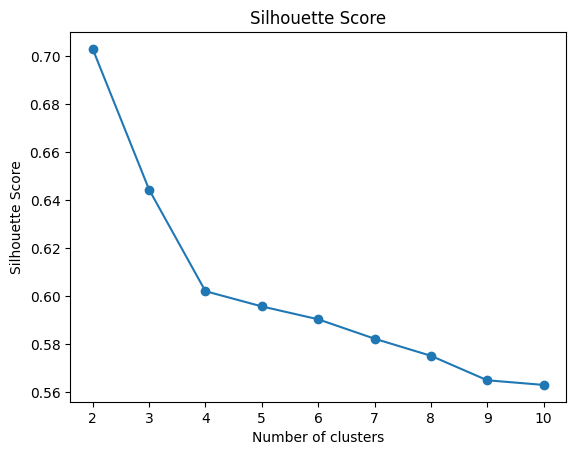

In [48]:
# Determine the optimal number of clusters using the Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

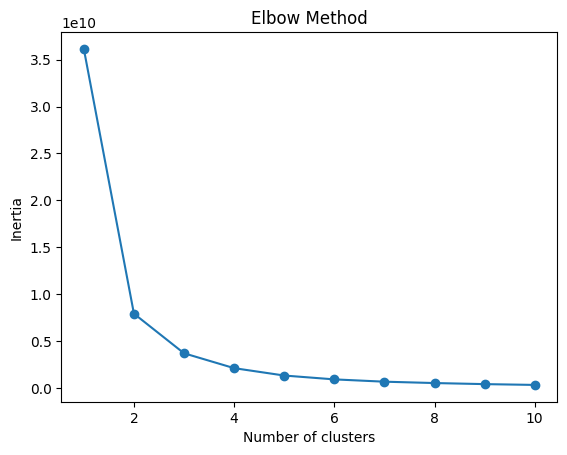

In [49]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [50]:
# Based on the Elbow Method and Silhouette Score, choose the optimal number of clusters
optimal_k = 4  # Example value, choose based on the plots

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display the first few rows with cluster labels
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CustomerSegment,Cluster
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,1,2,29.85,29.85,0,Free Riders,2
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,1,0,3,56.95,1889.50,0,Lost Causes,1
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,1,3,53.85,108.15,1,Vulnerable,2
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,0,0,1,0,0,42.30,1840.75,0,Lost Causes,1
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,1,2,70.70,151.65,1,Vulnerable,2


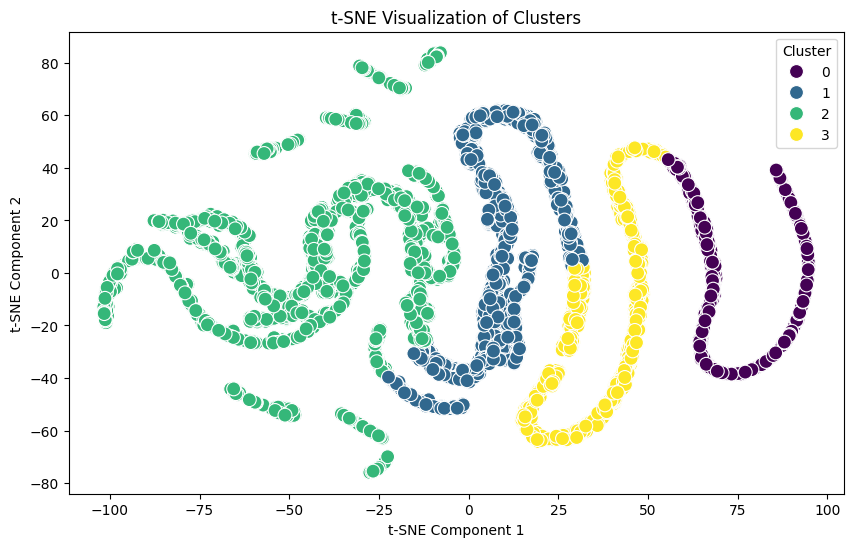

In [52]:
from sklearn.manifold import TSNE
import seaborn as sns

# Perform t-SNE to reduce the data to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add t-SNE components to the dataframe
df['t-SNE1'] = X_tsne[:, 0]
df['t-SNE2'] = X_tsne[:, 1]

# Plot the clusters using t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

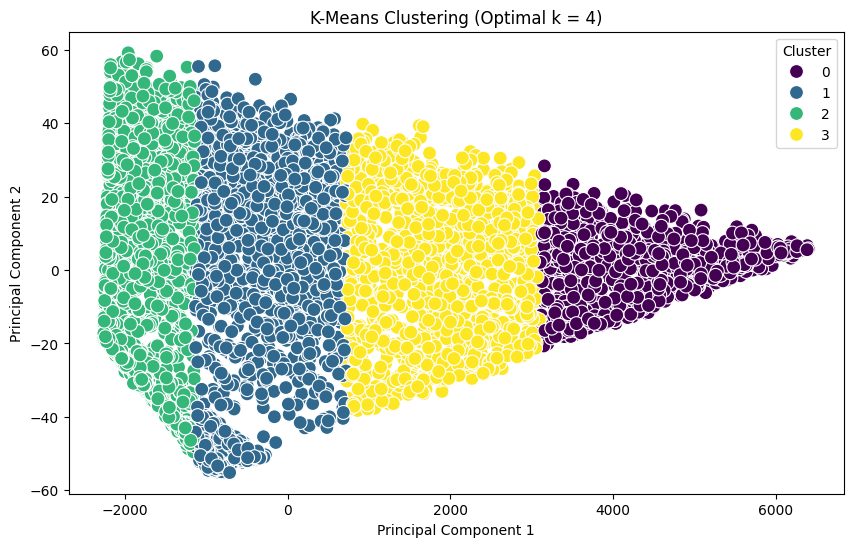

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add the PCA components to the dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('K-Means Clustering (Optimal k = 4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

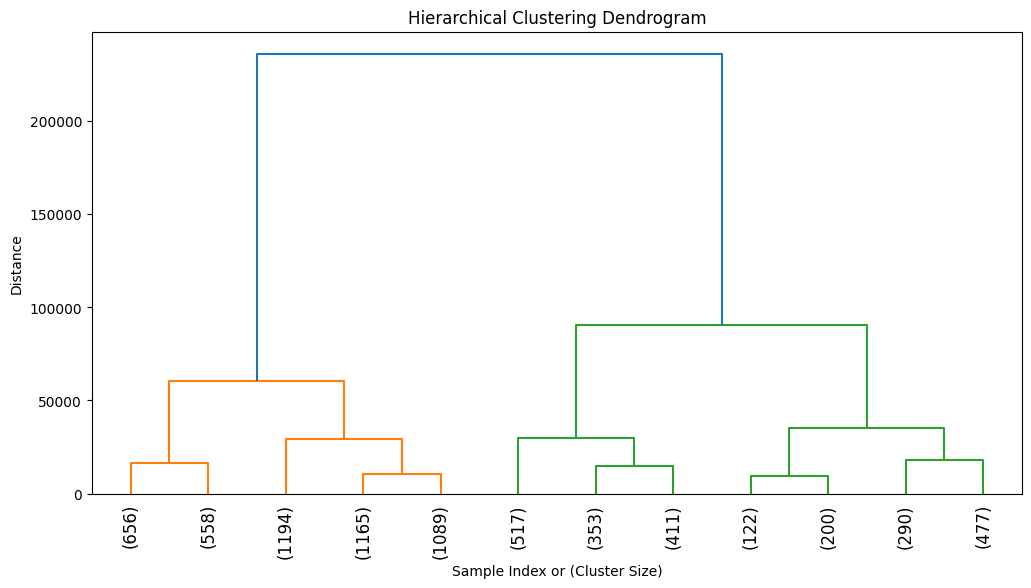

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(X, method='ward')  # 'ward' minimizes the variance of clusters being merged

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

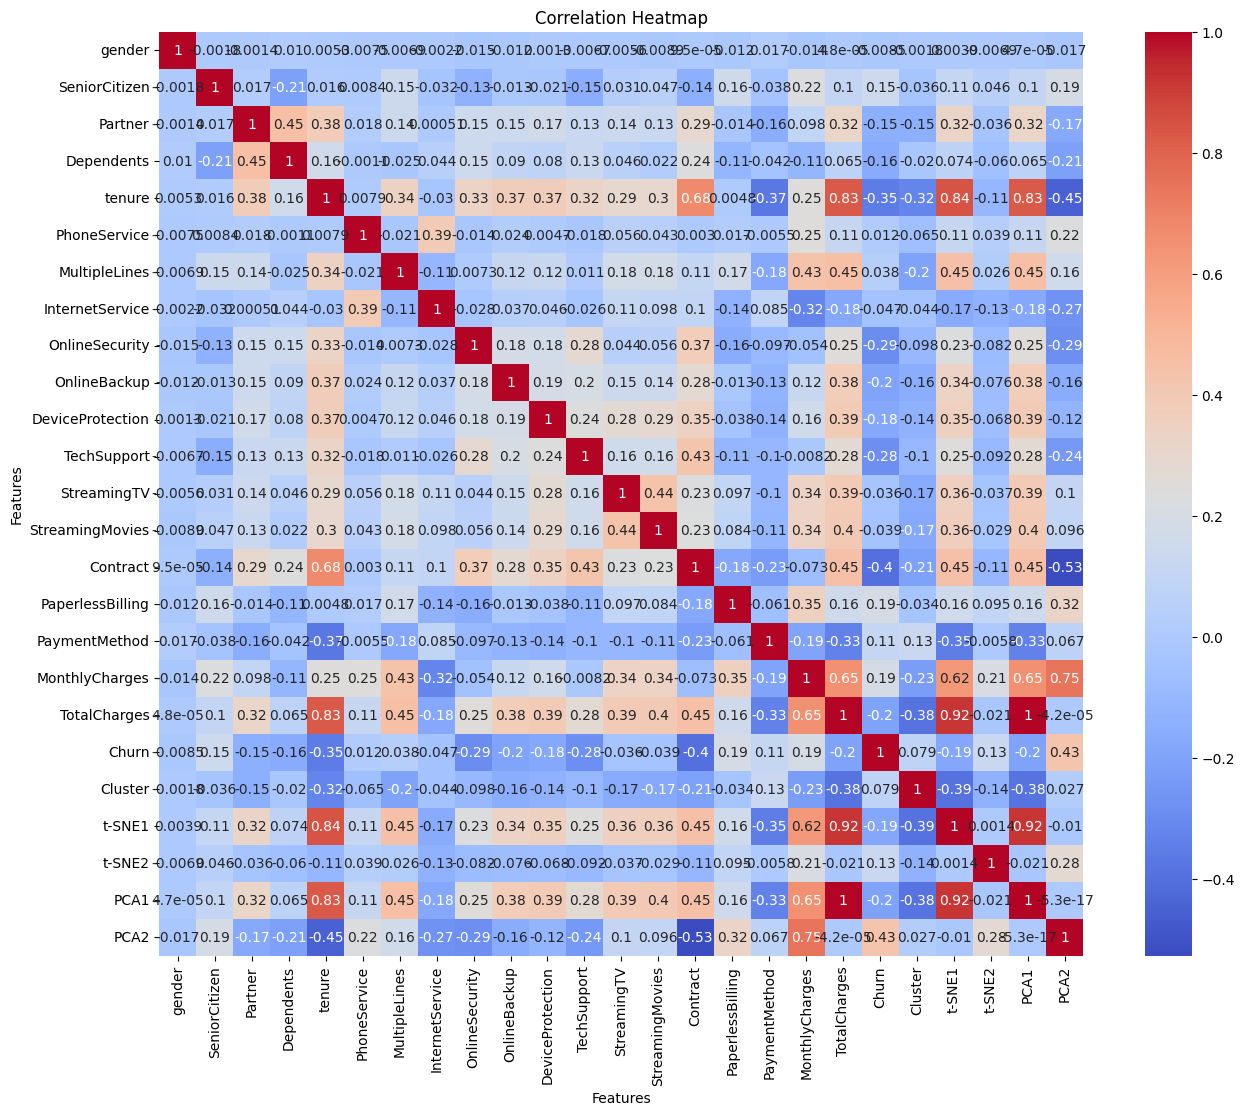

In [58]:
# Calculate the correlation matrix for numerical features only
numerical_features = df.select_dtypes(include=['number']).columns  # Select numerical columns
corr_matrix = df[numerical_features].corr()

# Create a heatmap with increased size
plt.figure(figsize=(16, 12))  # Increased figure size (width, height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set title and labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [59]:
# Churn rate by gender
churn_rate_gender = df.groupby('gender')['Churn'].mean()
print(churn_rate_gender)

# Churn rate by senior citizen status
churn_rate_senior = df.groupby('SeniorCitizen')['Churn'].mean()
print(churn_rate_senior)

# Churn rate by partner status
churn_rate_partner = df.groupby('Partner')['Churn'].mean()
print(churn_rate_partner)

gender
0    0.269595
1    0.262046
Name: Churn, dtype: float64
SeniorCitizen
0    0.236503
1    0.416813
Name: Churn, dtype: float64
Partner
0    0.329761
1    0.197171
Name: Churn, dtype: float64


In [60]:
# Average monthly charges for churned customers
avg_monthly_charges_churned = df[df['Churn'] == 1]['MonthlyCharges'].mean()
print(avg_monthly_charges_churned)

# Average monthly charges for non-churned customers
avg_monthly_charges_non_churned = df[df['Churn'] == 0]['MonthlyCharges'].mean()
print(avg_monthly_charges_non_churned)

74.44133226324237
61.307408483439865


In [62]:

# Top 5 features correlated with churn
top_5_features = corr_matrix['Churn'].sort_values(ascending=False)[1:6]
print(top_5_features)

PCA2                0.429853
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
t-SNE2              0.129049
Name: Churn, dtype: float64


In [63]:
# Churn rate by contract type
churn_rate_contract = df.groupby('Contract')['Churn'].mean()
print(churn_rate_contract)

Contract
0    0.427097
1    0.112772
2    0.028487
Name: Churn, dtype: float64


In [64]:
# RFM analysis
df['Recency'] = df['tenure'].apply(lambda x: 1 if x <= 30 else 2 if x <= 60 else 3)
df['Frequency'] = df['MonthlyCharges'].apply(lambda x: 1 if x <= 50 else 2 if x <= 100 else 3)
df['Monetary'] = df['TotalCharges'].apply(lambda x: 1 if x <= 1000 else 2 if x <= 2000 else 3)

# Customer segmentation
df['RFM_Score'] = df['Recency'] + df['Frequency'] + df['Monetary']
print(df['RFM_Score'].value_counts())

RFM_Score
4    1537
3    1364
7    1188
8     986
5     917
6     616
9     424
Name: count, dtype: int64


In [65]:
# Average revenue per user (ARPU) by churn status
arpu_churned = df[df['Churn'] == 1]['MonthlyCharges'].mean()
arpu_non_churned = df[df['Churn'] == 0]['MonthlyCharges'].mean()
print('ARPU Churned:', arpu_churned)
print('ARPU Non-Churned:', arpu_non_churned)

ARPU Churned: 74.44133226324237
ARPU Non-Churned: 61.307408483439865
